In [1]:
import bayesian_surprise3 as bs3

import json

from datetime import date, datetime
from urllib.request import urlopen
from random import choice, randint

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns

In [5]:
# the combine relative data
cr = pd.read_csv('../combRel.csv').drop(0).drop(3222).drop(3223).drop(['DATE_RANGE_START'], axis=1)

cr = cr[cr.FIPS < 60000]

cr.FIPS = cr.FIPS.astype(int).astype(str).apply(lambda f: f.zfill(5))
cr.POPN = cr.POPN.fillna(0.0).astype(float)
cr['state'] = cr.FIPS.apply(lambda f: f[:2])
cr.replace([np.inf, -np.inf], 0.0, inplace=True)
cr = cr.set_index('FIPS')

acr = cr.drop('state', axis=1).div(cr.POPN, axis=0).drop('POPN', axis=1)
acr.replace([np.inf, -np.inf], 0.0, inplace=True)
acr['state'] = cr.state

pop = cr.POPN
cr = cr.drop('POPN', axis=1)

# cases
cases = pd.read_csv('../data/nyt-MA-cases20-22.csv')
cases.where(cases > 0.0, 0.0, inplace=True)       # replaces where false
cases.fips = cases.fips.astype(int).astype(str).apply(lambda f: f.zfill(5))
cases['state'] = cases.fips.apply(lambda f: f[:2])
cases = cases.set_index('fips')

# # deaths
deaths = pd.read_csv('../data/nyt-MA-deaths20-22.csv')
deaths.where(deaths > 0.0, 0.0, inplace=True)
deaths.fips = deaths.fips.astype(int).astype(str).apply(lambda f: f.zfill(5))
deaths['state'] = deaths.fips.apply(lambda f: f[:2])
deaths = deaths.set_index('fips')

In [6]:
# state population
pop = pd.DataFrame(pop)
pop = pop.reset_index()
pop['state'] = pop.FIPS.apply(lambda f: f[:2])
# pop = pop.set_index('state')
# pop = pop.drop(['index'])

spop = pop.groupby(['state']).sum().reset_index()
spop = spop.set_index('state') #.drop('index', axis=1)

print('total population: ', spop.sum())

# state traffic

scr = cr.groupby(['state']).sum().reset_index()
scr = scr.set_index('state')


total population:  POPN    329434062.0
dtype: float64


In [7]:
# spop
# scr
acr

,202001,202002,202003,202004,202005,202006,202007,202008,202009,202010,...,202102,202103,202104,202105,202106,202107,202108,202109,202110,state
FIPS,,,,,,,,,,,,,,,,,,,,,
01001,9.871689,9.527402,8.238810,5.301220,7.827767,8.424846,8.654787,8.663621,8.479081,9.220251,...,8.289821,10.560477,10.554689,10.848891,10.110767,10.464939,10.307329,10.092564,11.110126,01
01003,6.921897,6.874293,6.414668,3.149149,8.444700,10.680767,11.599620,8.470328,6.183691,6.673113,...,5.880940,9.915194,9.194669,10.438695,11.569893,13.244676,8.748477,7.916053,8.444779,01
01005,4.497743,4.159258,3.763797,2.640083,3.566635,3.889747,3.978364,3.956078,3.892879,4.130343,...,3.617146,4.553052,4.869616,4.867054,4.569116,4.600594,4.450242,4.668226,4.805238,01
01007,10.303216,9.490558,8.211240,5.552945,6.924512,7.495934,7.484731,8.461059,9.000723,9.396910,...,8.543775,10.429075,11.025027,10.450081,8.966570,8.717022,10.790793,11.398536,12.217158,01
01009,13.311149,12.697922,11.281156,8.168092,10.928731,11.624147,12.001745,12.145528,12.091069,12.893416,...,11.654486,14.678070,15.323986,15.540179,13.631784,13.833670,14.493979,14.622834,15.520448,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56037,3.040541,2.665526,2.315516,1.755068,2.238183,2.574157,2.793734,3.018325,2.818293,2.808146,...,2.208821,2.731868,2.773112,3.006538,3.121552,3.295456,3.456495,3.189816,3.260188,56
56039,4.780738,4.524067,2.671235,0.824275,1.574797,4.612121,7.693110,5.997659,4.672469,3.278206,...,3.462442,4.213942,2.231859,3.898370,8.156318,8.683194,5.963783,4.238882,2.874112,56
56041,2.974672,2.617264,2.730547,2.045362,2.604798,3.060895,3.399604,3.353351,3.116646,2.936879,...,2.289686,2.869107,2.777195,3.247242,3.399357,3.701855,3.363295,3.343903,2.989760,56


In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 15))

sns.lineplot(data=scr.T, legend=False, ax=ax1)

ax1.set_title('State Traffic Data')
ax1.set_xlabel('Months')
ax1.set_ylabel('Traffic')
ax1.set_xticklabels(scr.columns, rotation=45)

# sns.stripplot(data=spop['POPN'], ax=ax2)
ax2.stem(spop['POPN'])

ax2.set_title('State Population')
ax2.set_xlabel('State')
ax2.set_ylabel('Population')


# Build the state data

In [8]:
scases = cases.groupby(['state']).sum().reset_index()
scases = scases.set_index('state')

sdeaths = deaths.groupby(['state']).sum().reset_index()
sdeaths = sdeaths.set_index('state')

# scases
sdeaths

,2020/01,2020/02,2020/03,2020/04,2020/05,2020/06,2020/07,2020/08,2020/09,2020/10,...,2021/05,2021/06,2021/07,2021/08,2021/09,2021/10,2021/11,2021/12,2022/01,2022/02
state,,,,,,,,,,,,,,,,,,,,,
01,0.0,0.0,14.0,258.0,358.0,320.0,630.0,602.0,361.0,429.0,...,251.0,208.0,184.0,748.0,2016.0,1274.0,549.0,337.0,632.0,416.0
02,0.0,0.0,2.0,5.0,1.0,4.0,10.0,14.0,18.0,25.0,...,22.0,8.0,12.0,55.0,132.0,148.0,149.0,98.0,103.0,25.0
04,0.0,0.0,24.0,303.0,586.0,739.0,2050.0,1336.0,623.0,325.0,...,304.0,310.0,310.0,540.0,1198.0,1170.0,1153.0,1922.0,1976.0,816.0
05,0.0,0.0,8.0,54.0,72.0,137.0,183.0,345.0,573.0,560.0,...,94.0,78.0,236.0,793.0,757.0,685.0,292.0,481.0,487.0,303.0
06,0.0,0.0,184.0,1873.0,2185.0,1841.0,3139.0,3798.0,2878.0,1763.0,...,1499.0,840.0,863.0,1756.0,3415.0,2864.0,2530.0,2039.0,3558.0,2069.0
08,0.0,0.0,69.0,707.0,670.0,246.0,151.0,111.0,109.0,248.0,...,292.0,224.0,153.0,224.0,412.0,645.0,1008.0,1097.0,859.0,433.0
09,0.0,0.0,69.0,2188.0,1689.0,378.0,110.0,34.0,43.0,108.0,...,141.0,40.0,15.0,65.0,271.0,140.0,143.0,256.0,850.0,213.0
10,0.0,0.0,10.0,142.0,214.0,143.0,76.0,20.0,31.0,72.0,...,36.0,33.0,139.0,47.0,74.0,137.0,87.0,108.0,245.0,70.0
11,0.0,0.0,9.0,215.0,242.0,85.0,34.0,22.0,20.0,19.0,...,27.0,9.0,8.0,11.0,14.0,16.0,6.0,15.0,78.0,16.0


# State cases / population

In [9]:
scp = scases.div(spop['POPN'], axis=0)
scp

,2020/01,2020/02,2020/03,2020/04,2020/05,2020/06,2020/07,2020/08,2020/09,2020/10,...,2021/05,2021/06,2021/07,2021/08,2021/09,2021/10,2021/11,2021/12,2022/01,2022/02
state,,,,,,,,,,,,,,,,,,,,,
01,0.000000e+00,0.000000e+00,0.000203,0.001233,0.002212,0.004083,0.010094,0.007789,0.005820,0.007637,...,0.003146,0.001540,0.007035,0.023188,0.019658,0.007228,0.002787,0.010333,0.065354,0.007820
02,0.000000e+00,0.000000e+00,0.000187,0.000310,0.000163,0.000935,0.003581,0.003384,0.003707,0.010617,...,0.002857,0.001476,0.005891,0.018290,0.036600,0.032583,0.018346,0.008626,0.083799,0.018599
04,1.347454e-07,0.000000e+00,0.000175,0.000856,0.001656,0.008012,0.012762,0.003740,0.002243,0.003699,...,0.002554,0.001813,0.004360,0.011411,0.011003,0.010149,0.013593,0.015052,0.065912,0.009213
05,0.000000e+00,0.000000e+00,0.000186,0.000897,0.001311,0.004463,0.007172,0.006389,0.007416,0.009402,...,0.001866,0.002641,0.012231,0.021923,0.014250,0.005777,0.005155,0.012423,0.069385,0.008394
06,7.620387e-08,6.350323e-07,0.000217,0.001064,0.001591,0.003024,0.006861,0.005341,0.002758,0.002899,...,0.001211,0.000687,0.005608,0.010458,0.007363,0.004538,0.004262,0.010926,0.073567,0.009056
08,0.000000e+00,0.000000e+00,0.000515,0.002112,0.001938,0.001091,0.002454,0.001868,0.002289,0.006328,...,0.005582,0.002542,0.003026,0.006988,0.009602,0.012177,0.015289,0.017028,0.056066,0.005634
09,0.000000e+00,0.000000e+00,0.000879,0.006908,0.004141,0.001221,0.000927,0.000900,0.001313,0.003842,...,0.002279,0.000567,0.001401,0.005268,0.004856,0.003441,0.005372,0.024879,0.053194,0.003457
10,0.000000e+00,0.000000e+00,0.000323,0.004474,0.004828,0.002016,0.003358,0.002676,0.003227,0.004801,...,0.004521,0.000890,0.001685,0.008558,0.013286,0.011385,0.009118,0.027539,0.068651,0.004516
11,0.000000e+00,0.000000e+00,0.000694,0.005370,0.006282,0.002141,0.002524,0.002618,0.001871,0.002722,...,0.001685,0.000613,0.001491,0.007061,0.008027,0.004331,0.003749,0.038403,0.051348,0.002441


/tmp/ipykernel_365040/3159689045.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(scp.columns, rotation=45)


[Text(0, 0, '2020/01'),
 Text(1, 0, '2020/02'),
 Text(2, 0, '2020/03'),
 Text(3, 0, '2020/04'),
 Text(4, 0, '2020/05'),
 Text(5, 0, '2020/06'),
 Text(6, 0, '2020/07'),
 Text(7, 0, '2020/08'),
 Text(8, 0, '2020/09'),
 Text(9, 0, '2020/10'),
 Text(10, 0, '2020/11'),
 Text(11, 0, '2020/12'),
 Text(12, 0, '2021/01'),
 Text(13, 0, '2021/02'),
 Text(14, 0, '2021/03'),
 Text(15, 0, '2021/04'),
 Text(16, 0, '2021/05'),
 Text(17, 0, '2021/06'),
 Text(18, 0, '2021/07'),
 Text(19, 0, '2021/08'),
 Text(20, 0, '2021/09'),
 Text(21, 0, '2021/10'),
 Text(22, 0, '2021/11'),
 Text(23, 0, '2021/12'),
 Text(24, 0, '2022/01'),
 Text(25, 0, '2022/02')]

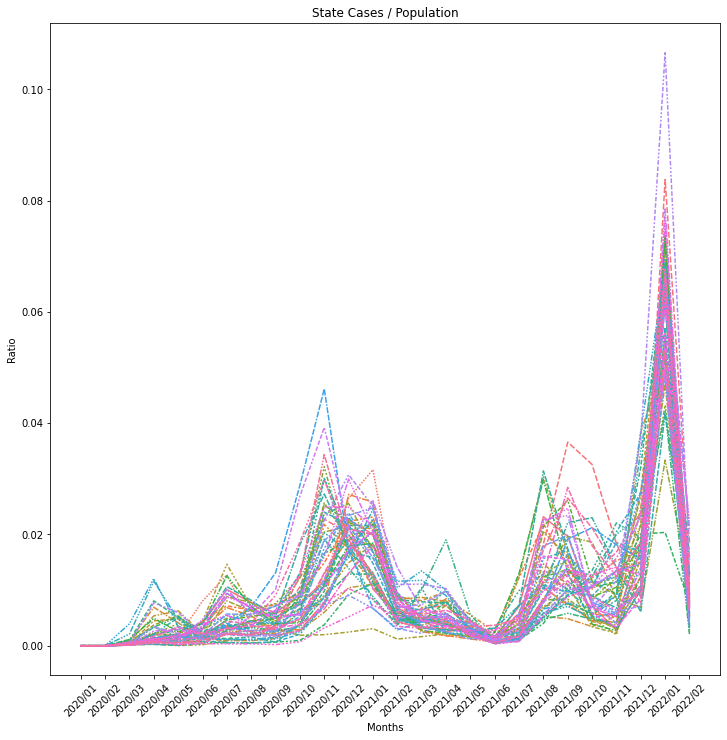

In [10]:
# sanity check - no <0.0

fig, ax = plt.subplots(1, figsize=(12, 12))

sns.lineplot(data=scp.T, legend=False)

ax.set_title('State Cases / Population')
ax.set_xlabel('Months')
ax.set_ylabel('Ratio')

ax.set_xticklabels(scp.columns, rotation=45)

In [12]:
# # sanity check

# scale = lambda v: (v.values - np.min(v.values)) / (np.max(v.values) - np.min(v.values))

# scale(cr.loc['01'] / spop.loc['01']) == scale(acr.loc['01'])

In [14]:
scp.to_csv('../final-data/state-data/state_cases-population.csv')

# State Deaths / Population

In [16]:
# state deaths population
sdp = sdeaths.div(spop['POPN'], axis=0)
sdp

,2020/01,2020/02,2020/03,2020/04,2020/05,2020/06,2020/07,2020/08,2020/09,2020/10,...,2021/05,2021/06,2021/07,2021/08,2021/09,2021/10,2021/11,2021/12,2022/01,2022/02
state,,,,,,,,,,,,,,,,,,,,,
01,0.0,0.000000e+00,2.844643e-06,0.000052,7.274158e-05,6.502040e-05,0.000128,0.000122,0.000073,0.000087,...,0.000051,0.000042,0.000037,0.000152,0.000410,0.000259,0.000112,0.000068,0.000128,0.000085
02,0.0,0.000000e+00,2.816156e-06,0.000007,1.408078e-06,5.632311e-06,0.000014,0.000020,0.000025,0.000035,...,0.000031,0.000011,0.000017,0.000077,0.000186,0.000208,0.000210,0.000138,0.000145,0.000035
04,0.0,0.000000e+00,3.233891e-06,0.000041,7.896083e-05,9.957689e-05,0.000276,0.000180,0.000084,0.000044,...,0.000041,0.000042,0.000042,0.000073,0.000161,0.000158,0.000155,0.000259,0.000266,0.000110
05,0.0,0.000000e+00,2.639809e-06,0.000018,2.375828e-05,4.520673e-05,0.000060,0.000114,0.000189,0.000185,...,0.000031,0.000026,0.000078,0.000262,0.000250,0.000226,0.000096,0.000159,0.000161,0.000100
06,0.0,0.000000e+00,4.673838e-06,0.000048,5.550182e-05,4.676378e-05,0.000080,0.000096,0.000073,0.000045,...,0.000038,0.000021,0.000022,0.000045,0.000087,0.000073,0.000064,0.000052,0.000090,0.000053
08,0.0,0.000000e+00,1.188074e-05,0.000122,1.153637e-04,4.235742e-05,0.000026,0.000019,0.000019,0.000043,...,0.000050,0.000039,0.000026,0.000039,0.000071,0.000111,0.000174,0.000189,0.000148,0.000075
09,0.0,0.000000e+00,1.939834e-05,0.000615,4.748375e-04,1.062691e-04,0.000031,0.000010,0.000012,0.000030,...,0.000040,0.000011,0.000004,0.000018,0.000076,0.000039,0.000040,0.000072,0.000239,0.000060
10,0.0,0.000000e+00,1.013367e-05,0.000144,2.168606e-04,1.449115e-04,0.000077,0.000020,0.000031,0.000073,...,0.000036,0.000033,0.000141,0.000048,0.000075,0.000139,0.000088,0.000109,0.000248,0.000071
11,0.0,0.000000e+00,1.262598e-05,0.000302,3.394986e-04,1.192454e-04,0.000048,0.000031,0.000028,0.000027,...,0.000038,0.000013,0.000011,0.000015,0.000020,0.000022,0.000008,0.000021,0.000109,0.000022


/tmp/ipykernel_365040/390511163.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(sdp.columns, rotation=45)


[Text(0, 0, '2020/01'),
 Text(1, 0, '2020/02'),
 Text(2, 0, '2020/03'),
 Text(3, 0, '2020/04'),
 Text(4, 0, '2020/05'),
 Text(5, 0, '2020/06'),
 Text(6, 0, '2020/07'),
 Text(7, 0, '2020/08'),
 Text(8, 0, '2020/09'),
 Text(9, 0, '2020/10'),
 Text(10, 0, '2020/11'),
 Text(11, 0, '2020/12'),
 Text(12, 0, '2021/01'),
 Text(13, 0, '2021/02'),
 Text(14, 0, '2021/03'),
 Text(15, 0, '2021/04'),
 Text(16, 0, '2021/05'),
 Text(17, 0, '2021/06'),
 Text(18, 0, '2021/07'),
 Text(19, 0, '2021/08'),
 Text(20, 0, '2021/09'),
 Text(21, 0, '2021/10'),
 Text(22, 0, '2021/11'),
 Text(23, 0, '2021/12'),
 Text(24, 0, '2022/01'),
 Text(25, 0, '2022/02')]

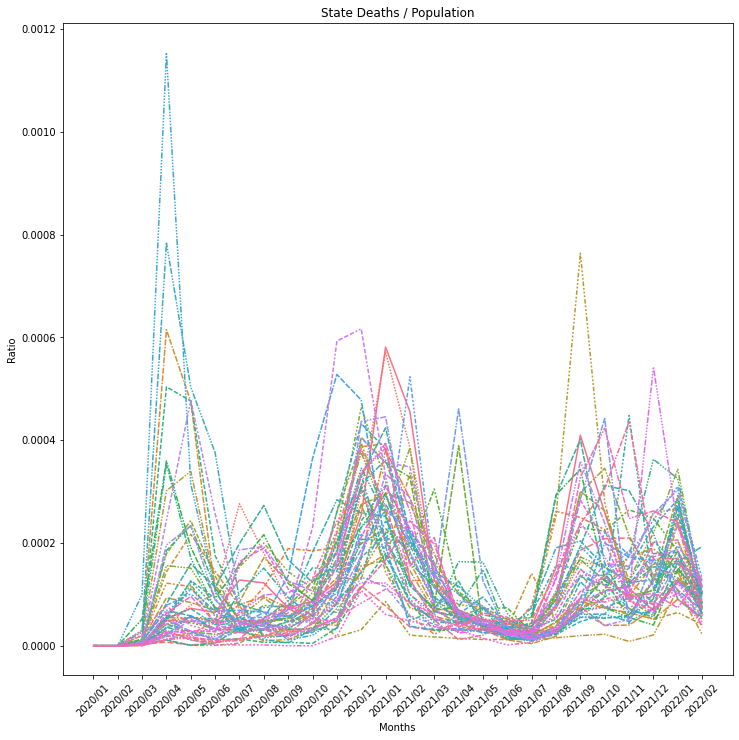

In [17]:
fig, ax = plt.subplots(1, figsize=(12, 12))

sns.lineplot(data=sdp.T, legend=False)

ax.set_title('State Deaths / Population')
ax.set_xlabel('Months')
ax.set_ylabel('Ratio')

ax.set_xticklabels(sdp.columns, rotation=45)

In [18]:
sdp.to_csv('../final-data/state-data/state_deaths-population.csv')

# State traffic / pop

In [19]:
# state relative population
srp = scr.div(spop['POPN'], axis=0)
srp

,202001,202002,202003,202004,202005,202006,202007,202008,202009,202010,...,202101,202102,202103,202104,202105,202106,202107,202108,202109,202110
state,,,,,,,,,,,,,,,,,,,,,
01,8.791001,8.318555,6.835930,4.323344,6.301946,7.031060,7.210707,7.550122,7.248548,7.857952,...,7.274284,7.134951,9.102779,9.232464,9.234617,8.518291,8.729766,9.019424,8.914255,9.496728
02,2.223807,1.878401,1.480133,0.971271,1.277084,1.508716,1.625163,1.569984,1.447553,1.428877,...,1.325503,1.243451,1.496374,1.521714,1.703181,1.813079,1.928660,1.890395,1.696279,1.650270
04,4.125806,3.624514,2.847416,1.635478,2.111148,2.347490,2.276756,2.443082,2.457577,2.764075,...,2.506730,2.497366,3.069496,3.012692,3.030917,2.738391,2.834647,3.105666,3.108443,3.273013
05,7.747637,7.292491,5.958339,4.100962,5.330577,5.868545,6.081759,6.546253,6.604742,7.040905,...,6.365528,5.440261,8.134129,8.158217,8.240777,7.585017,7.646959,8.301984,8.338396,8.785955
06,3.681417,3.345847,2.411083,1.247725,1.551726,1.889878,2.020094,2.074080,1.963689,2.098140,...,1.802961,1.786624,2.143145,2.202407,2.412340,2.347788,2.445790,2.531002,2.499879,2.602221
08,6.043524,5.072015,3.901822,2.056234,2.856970,3.557737,4.079901,4.183168,3.829910,3.923476,...,3.516228,3.321795,4.054994,4.089994,4.435148,4.462928,4.703066,4.681494,4.563863,4.601139
09,3.576415,3.155135,2.304384,1.196550,1.580092,1.987193,2.194325,2.333191,2.294192,2.335481,...,1.950260,1.774095,2.274135,2.303457,2.568599,2.390827,2.369991,2.349934,2.517088,2.621187
10,3.643661,3.416920,2.508648,1.414124,1.785128,2.568797,2.783615,2.808551,2.544842,2.547040,...,2.159038,1.985920,2.622848,2.671449,2.942397,2.968029,3.278538,3.113790,2.997882,3.065105
11,4.637618,4.385787,2.972221,1.094350,1.299024,1.533832,1.826250,1.820179,1.821616,1.897560,...,1.894741,1.457132,1.849539,1.866075,1.873823,2.036005,2.304237,2.274771,2.187839,2.305142


/tmp/ipykernel_365040/2111579705.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(srp.columns, rotation=45)


[Text(0, 0, '202001'),
 Text(1, 0, '202002'),
 Text(2, 0, '202003'),
 Text(3, 0, '202004'),
 Text(4, 0, '202005'),
 Text(5, 0, '202006'),
 Text(6, 0, '202007'),
 Text(7, 0, '202008'),
 Text(8, 0, '202009'),
 Text(9, 0, '202010'),
 Text(10, 0, '202011'),
 Text(11, 0, '202012'),
 Text(12, 0, '202101'),
 Text(13, 0, '202102'),
 Text(14, 0, '202103'),
 Text(15, 0, '202104'),
 Text(16, 0, '202105'),
 Text(17, 0, '202106'),
 Text(18, 0, '202107'),
 Text(19, 0, '202108'),
 Text(20, 0, '202109'),
 Text(21, 0, '202110')]

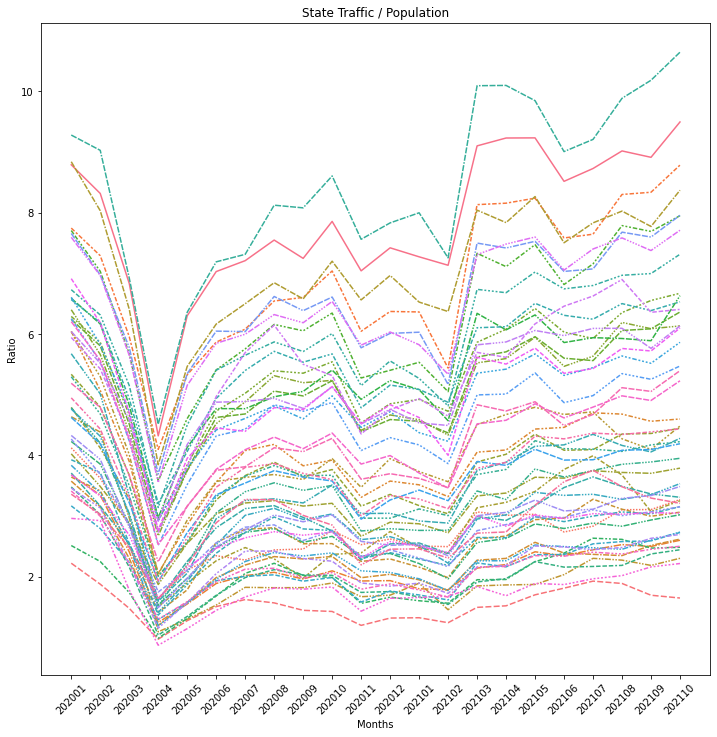

In [20]:
fig, ax = plt.subplots(1, figsize=(12, 12))

sns.lineplot(data=srp.T, legend=False)

ax.set_title('State Traffic / Population')
ax.set_xlabel('Months')
ax.set_ylabel('Ratio')

ax.set_xticklabels(srp.columns, rotation=45)

In [22]:
srp.to_csv('../final-data/state-data/state_traffic-population.csv')

# State Case / Traffic

In [23]:
scases_ = scases[['2020/01', '2020/02', '2020/03', '2020/04', '2020/05', '2020/06',
       '2020/07', '2020/08', '2020/09', '2020/10', '2020/11', '2020/12',
       '2021/01', '2021/02', '2021/03', '2021/04', '2021/05', '2021/06',
       '2021/07', '2021/08', '2021/09', '2021/10']]
scases_.columns = scr.columns

sct = scases_.div(scr, axis=0)
sct

,202001,202002,202003,202004,202005,202006,202007,202008,202009,202010,...,202101,202102,202103,202104,202105,202106,202107,202108,202109,202110
state,,,,,,,,,,,,,,,,,,,,,
01,0.000000e+00,0.000000e+00,0.000030,0.000285,0.000351,0.000581,0.001400,0.001032,0.000803,0.000972,...,0.002749,0.000957,0.000494,0.000276,0.000341,0.000181,0.000806,0.002571,0.002205,0.000761
02,0.000000e+00,0.000000e+00,0.000127,0.000319,0.000128,0.000620,0.002203,0.002155,0.002561,0.007430,...,0.007697,0.004372,0.004435,0.004803,0.001677,0.000814,0.003055,0.009675,0.021577,0.019744
04,3.265918e-08,0.000000e+00,0.000061,0.000523,0.000784,0.003413,0.005605,0.001531,0.000913,0.001338,...,0.012618,0.003165,0.001079,0.000925,0.000843,0.000662,0.001538,0.003674,0.003540,0.003101
05,0.000000e+00,0.000000e+00,0.000031,0.000219,0.000246,0.000760,0.001179,0.000976,0.001123,0.001335,...,0.003635,0.001647,0.000349,0.000215,0.000226,0.000348,0.001599,0.002641,0.001709,0.000658
06,2.069961e-08,1.897972e-07,0.000090,0.000853,0.001025,0.001600,0.003397,0.002575,0.001405,0.001382,...,0.014317,0.003491,0.001179,0.000844,0.000502,0.000293,0.002293,0.004132,0.002945,0.001744
08,0.000000e+00,0.000000e+00,0.000132,0.001027,0.000679,0.000307,0.000601,0.000447,0.000598,0.001613,...,0.003014,0.001754,0.001436,0.002062,0.001258,0.000569,0.000643,0.001493,0.002104,0.002647
09,0.000000e+00,0.000000e+00,0.000382,0.005773,0.002621,0.000614,0.000422,0.000386,0.000572,0.001645,...,0.009271,0.004742,0.003825,0.003459,0.000887,0.000237,0.000591,0.002242,0.001929,0.001313
10,0.000000e+00,0.000000e+00,0.000129,0.003164,0.002704,0.000785,0.001206,0.000953,0.001268,0.001885,...,0.009676,0.004454,0.003092,0.003643,0.001536,0.000300,0.000514,0.002748,0.004432,0.003714
11,0.000000e+00,0.000000e+00,0.000234,0.004907,0.004836,0.001396,0.001382,0.001438,0.001027,0.001434,...,0.005841,0.003587,0.002970,0.002394,0.000899,0.000301,0.000647,0.003104,0.003669,0.001879


/tmp/ipykernel_365040/282432606.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(sct.columns, rotation=45)


[Text(0, 0, '202001'),
 Text(1, 0, '202002'),
 Text(2, 0, '202003'),
 Text(3, 0, '202004'),
 Text(4, 0, '202005'),
 Text(5, 0, '202006'),
 Text(6, 0, '202007'),
 Text(7, 0, '202008'),
 Text(8, 0, '202009'),
 Text(9, 0, '202010'),
 Text(10, 0, '202011'),
 Text(11, 0, '202012'),
 Text(12, 0, '202101'),
 Text(13, 0, '202102'),
 Text(14, 0, '202103'),
 Text(15, 0, '202104'),
 Text(16, 0, '202105'),
 Text(17, 0, '202106'),
 Text(18, 0, '202107'),
 Text(19, 0, '202108'),
 Text(20, 0, '202109'),
 Text(21, 0, '202110')]

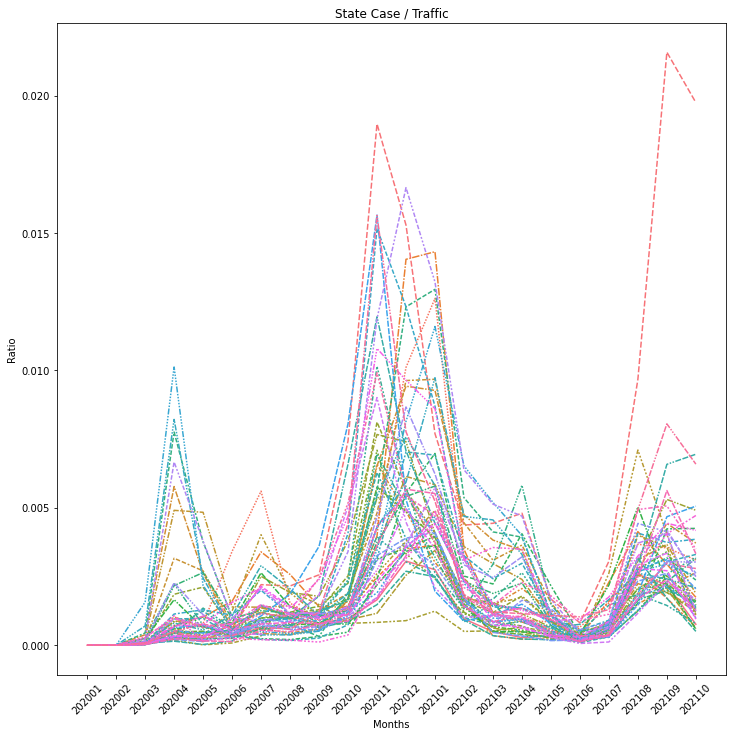

In [24]:
fig, ax = plt.subplots(1, figsize=(12, 12))

sns.lineplot(data=sct.T, legend=False)

ax.set_title('State Case / Traffic')
ax.set_xlabel('Months')
ax.set_ylabel('Ratio')

ax.set_xticklabels(sct.columns, rotation=45)

In [26]:
sct.to_csv('../final-data/state-data/state_case-population.csv')

# State Deaths / traffic

In [27]:
sdeaths_ = sdeaths[['2020/01', '2020/02', '2020/03', '2020/04', '2020/05', '2020/06',
       '2020/07', '2020/08', '2020/09', '2020/10', '2020/11', '2020/12',
       '2021/01', '2021/02', '2021/03', '2021/04', '2021/05', '2021/06',
       '2021/07', '2021/08', '2021/09', '2021/10']]
sdeaths_.columns = scr.columns

sdt = sdeaths_.div(scr, axis=0)
sdt

,202001,202002,202003,202004,202005,202006,202007,202008,202009,202010,...,202101,202102,202103,202104,202105,202106,202107,202108,202109,202110
state,,,,,,,,,,,,,,,,,,,,,
01,0.0,0.000000e+00,4.161310e-07,0.000012,1.154272e-05,9.247596e-06,1.775262e-05,1.620101e-05,0.000010,0.000011,...,0.000080,0.000064,0.000014,0.000008,0.000006,4.961472e-06,0.000004,0.000017,0.000046,0.000027
02,0.0,0.000000e+00,1.902636e-06,0.000007,1.102572e-06,3.733182e-06,8.664227e-06,1.255623e-05,0.000018,0.000025,...,0.000058,0.000029,0.000020,0.000029,0.000018,6.212979e-06,0.000009,0.000041,0.000110,0.000126
04,0.0,0.000000e+00,1.135728e-06,0.000025,3.740185e-05,4.241846e-05,1.213253e-04,7.368558e-05,0.000034,0.000016,...,0.000228,0.000154,0.000043,0.000016,0.000014,1.525388e-05,0.000015,0.000023,0.000052,0.000048
05,0.0,0.000000e+00,4.430445e-07,0.000004,4.456981e-06,7.703227e-06,9.928976e-06,1.739037e-05,0.000029,0.000026,...,0.000062,0.000023,0.000016,0.000005,0.000004,3.393287e-06,0.000010,0.000032,0.000030,0.000026
06,0.0,0.000000e+00,1.938481e-06,0.000038,3.576780e-05,2.474433e-05,3.947076e-05,4.651417e-05,0.000037,0.000021,...,0.000211,0.000160,0.000084,0.000029,0.000016,9.088166e-06,0.000009,0.000018,0.000035,0.000028
08,0.0,0.000000e+00,3.044921e-06,0.000059,4.037975e-05,1.190572e-05,6.372674e-06,4.568904e-06,0.000005,0.000011,...,0.000041,0.000017,0.000006,0.000011,0.000011,8.642165e-06,0.000006,0.000008,0.000016,0.000024
09,0.0,0.000000e+00,8.418015e-06,0.000514,3.005126e-04,5.347701e-05,1.409312e-05,4.096794e-06,0.000005,0.000013,...,0.000152,0.000091,0.000033,0.000027,0.000015,4.703567e-06,0.000002,0.000008,0.000030,0.000015
10,0.0,0.000000e+00,4.039497e-06,0.000102,1.214819e-04,5.641221e-05,2.766759e-05,7.216301e-06,0.000012,0.000029,...,0.000077,0.000169,0.000053,0.000025,0.000012,1.126711e-05,0.000043,0.000015,0.000025,0.000045
11,0.0,0.000000e+00,4.247994e-06,0.000276,2.613490e-04,7.774343e-05,2.611808e-05,1.695630e-05,0.000015,0.000014,...,0.000094,0.000100,0.000036,0.000031,0.000020,6.201350e-06,0.000005,0.000007,0.000009,0.000010


/tmp/ipykernel_365040/3657789844.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(sdt.columns, rotation=45)


[Text(0, 0, '202001'),
 Text(1, 0, '202002'),
 Text(2, 0, '202003'),
 Text(3, 0, '202004'),
 Text(4, 0, '202005'),
 Text(5, 0, '202006'),
 Text(6, 0, '202007'),
 Text(7, 0, '202008'),
 Text(8, 0, '202009'),
 Text(9, 0, '202010'),
 Text(10, 0, '202011'),
 Text(11, 0, '202012'),
 Text(12, 0, '202101'),
 Text(13, 0, '202102'),
 Text(14, 0, '202103'),
 Text(15, 0, '202104'),
 Text(16, 0, '202105'),
 Text(17, 0, '202106'),
 Text(18, 0, '202107'),
 Text(19, 0, '202108'),
 Text(20, 0, '202109'),
 Text(21, 0, '202110')]

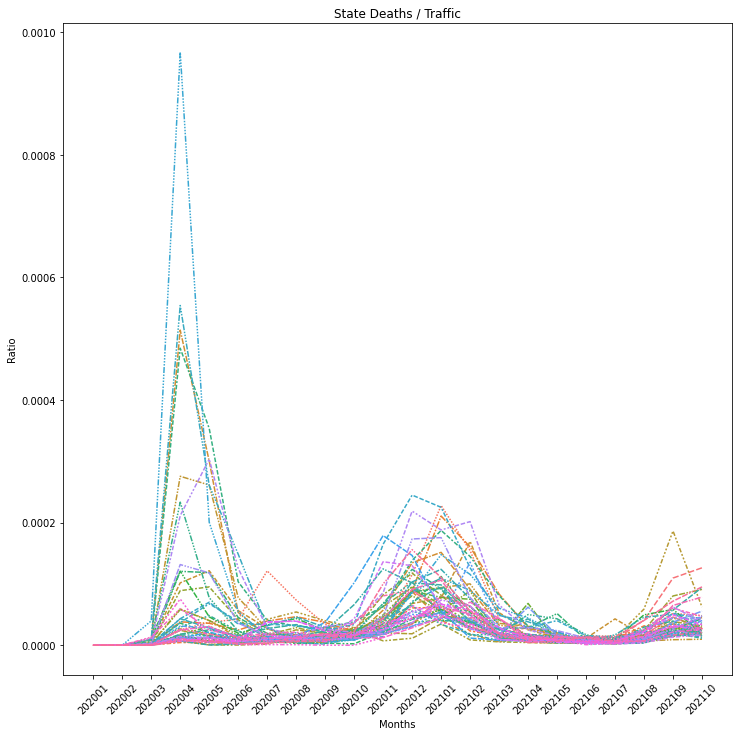

In [28]:
fig, ax = plt.subplots(1, figsize=(12, 12))

sns.lineplot(data=sdt.T, legend=False)

ax.set_title('State Deaths / Traffic')
ax.set_xlabel('Months')
ax.set_ylabel('Ratio')

ax.set_xticklabels(sdt.columns, rotation=45)

In [29]:
sdt.to_csv('../final-data/state-data/state_deaths-traffic.csv')